In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0.00
1,0,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0.00
2,1,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0.00
3,1,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0.00
4,2,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0.00


In [ ]:
df.shape

(31780, 31)

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,1
V8,1
V9,1


In [ ]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.shape

(31779, 31)

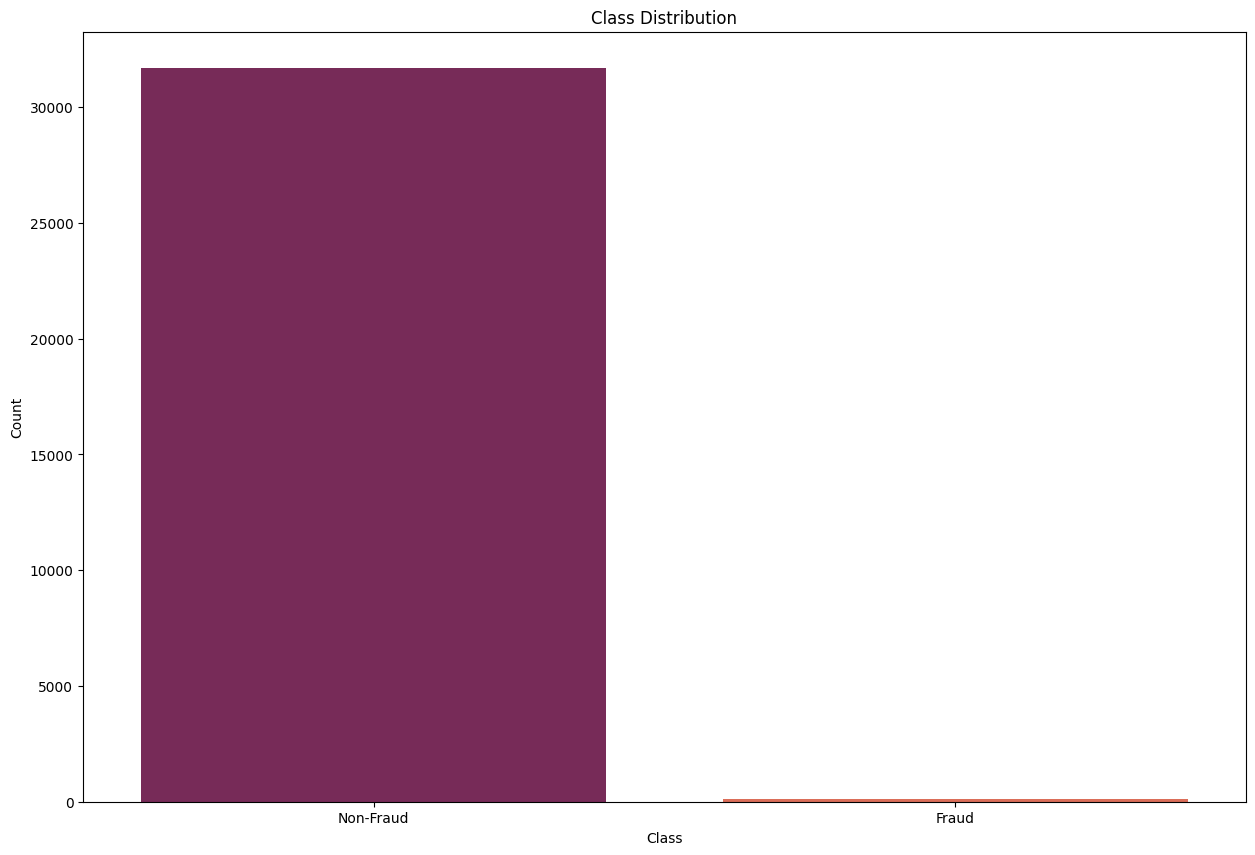

In [ ]:
bar_df = df.Class.value_counts()
bar_df = pd.DataFrame(bar_df).reset_index()
bar_df.columns = ['Class','count']
bar_df.Class = ['Non-Fraud','Fraud']
bar_df

fig = plt.figure(figsize=(15,10))
sns.barplot(bar_df, x='Class',y='count',palette='rocket')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [ ]:
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=10)


df_selected = selector.fit_transform(df, df['Class'])

df_selected.shape

(31779, 10)

In [ ]:
df_selected = pd.DataFrame(df_selected)
df_selected[9].value_counts()

,count
9,
0.00,31677
1.00,102


In [ ]:
correlation_matrix = df_selected.corr()
correlation_matrix

,0,1,2,3,4,5,6,7,8,9
0,1.00,-0.08,-0.11,-0.02,0.02,0.00,-0.02,0.03,0.07,0.23
1,-0.08,1.00,-0.07,-0.06,-0.11,-0.04,-0.06,0.03,-0.08,-0.41
2,-0.11,-0.07,1.00,-0.01,-0.01,0.02,-0.10,-0.04,0.01,-0.01
3,-0.02,-0.06,-0.01,1.00,0.03,0.02,-0.02,-0.03,0.02,0.03
4,0.02,-0.11,-0.01,0.03,1.00,-0.10,0.00,0.01,-0.04,0.05
5,0.00,-0.04,0.02,0.02,-0.10,1.00,0.02,-0.01,0.00,0.05
6,-0.02,-0.06,-0.10,-0.02,0.00,0.02,1.00,-0.12,0.04,0.02
7,0.03,0.03,-0.04,-0.03,0.01,-0.01,-0.12,1.00,-0.01,0.02
8,0.07,-0.08,0.01,0.02,-0.04,0.00,0.04,-0.01,1.00,0.12
9,0.23,-0.41,-0.01,0.03,0.05,0.05,0.02,0.02,0.12,1.00


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

df_selected = df_selected.rename(columns = {9:'Class'})

X = df_selected.drop('Class', axis=1)
y = df_selected['Class']

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (21186, 9)
X_test shape: (10593, 9)
y_train shape: (21186,)
y_test shape: (10593,)


In [ ]:
X_test.head()

,0,1,2,3,4,5,6,7,8
8,-0.27,0.07,-0.33,0.57,0.05,-0.07,0.37,-0.38,0.01
15,-1.47,-1.07,1.11,0.43,0.26,0.50,-0.04,-0.09,-0.18
20,0.83,-0.37,-0.81,-1.30,-0.14,-0.30,0.07,-0.42,0.09
22,2.26,1.13,0.00,-0.82,-0.31,0.02,0.60,0.11,-0.04
30,0.76,-0.15,-0.22,0.35,-0.07,-0.25,0.51,0.29,-0.02


In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(predictions = True, verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 28/29 [01:36<00:00,  1.06it/s]

[LightGBM] [Info] Number of positive: 68, number of negative: 21118
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 21186, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003210 -> initscore=-5.738373
[LightGBM] [Info] Start training from score -5.738373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [01:36<00:00,  3.34s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.99,0.94,0.94,0.99,0.07
GaussianNB,0.98,0.93,0.93,0.99,0.14
NearestCentroid,1.00,0.90,0.90,1.00,0.06
XGBClassifier,1.00,0.88,0.88,1.00,0.21
ExtraTreesClassifier,1.00,0.87,0.87,1.00,2.88
BaggingClassifier,1.00,0.87,0.87,1.00,4.21
LabelPropagation,1.00,0.87,0.87,1.00,30.89
LabelSpreading,1.00,0.87,0.87,1.00,38.03
DecisionTreeClassifier,1.00,0.87,0.87,1.00,1.20


In [ ]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression




model = NearestCentroid()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10559
         1.0       0.68      0.79      0.73        34

    accuracy                           1.00     10593
   macro avg       0.84      0.90      0.86     10593
weighted avg       1.00      1.00      1.00     10593

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10559
         1.0       0.67      0.59      0.62        34

    accuracy                           1.00     10593
   macro avg       0.83      0.79      0.81     10593
weighted avg       1.00      1.00      1.00     10593



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10546,    13],
       [    7,    27]])

In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[10549,    10],
       [   14,    20]])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, BatchNormalization

early_stopping = callbacks.EarlyStopping(
    patience = 5,
    restore_best_weights=True,
)

<Axes: >

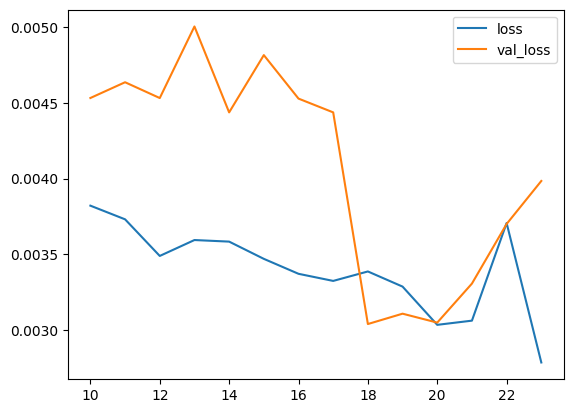

In [ ]:
ANNmodel = Sequential([
    layers.BatchNormalization(input_shape=(X_train.shape[1],)),
    layers.Dense(12, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(6, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

ANNmodel.compile(
    optimizer='adam',
    loss='mae'
)

history = ANNmodel.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100,
    callbacks=[early_stopping],
    verbose=0
)

history_df = pd.DataFrame(history.history)
history_df.loc[10:, ['loss', 'val_loss']].plot()



In [ ]:
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Minimum Validation Loss: 0.0030


In [ ]:
y_pred_ann = ANNmodel.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5).astype('int32')
y_pred_ann = pd.DataFrame(y_pred_ann, columns=['Class'])
y_pred_ann.value_counts()



332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,count
Class,
0,10553
1,40


In [ ]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10559
         1.0       0.53      0.62      0.57        34

    accuracy                           1.00     10593
   macro avg       0.76      0.81      0.78     10593
weighted avg       1.00      1.00      1.00     10593



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_nc = {'metric': ['euclidean','manhattan','cosine']}
grid_nc = GridSearchCV(NearestCentroid(), param_grid_nc, cv=3, scoring = 'accuracy')
grid_nc.fit(X_train, y_train)

print(grid_nc.best_params_)
print(grid_nc.best_score_)

{'metric': 'manhattan'}
0.9983479656376852


In [ ]:
param_grid_lr_ = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga']
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr_, cv=3, scoring = 'accuracy')
grid_lr.fit(X_train, y_train)

print(grid_lr.best_params_)
print(grid_lr.best_score_)


{'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.997309544038516
